In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:


data = pd.read_csv('~/Downloads/Mental Health Dataset.csv')

In [3]:
# Top 5 rows of the dataset
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
# Checking the data shape
data.shape

(292364, 17)

In [5]:
# Checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [6]:
# Checking the Null value of the data 
data.isnull().sum()


Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [7]:
null_counts_normalized = data.isnull().sum() / len(data)
print(null_counts_normalized)


Timestamp                  0.000000
Gender                     0.000000
Country                    0.000000
Occupation                 0.000000
self_employed              0.017793
family_history             0.000000
treatment                  0.000000
Days_Indoors               0.000000
Growing_Stress             0.000000
Changes_Habits             0.000000
Mental_Health_History      0.000000
Mood_Swings                0.000000
Coping_Struggles           0.000000
Work_Interest              0.000000
Social_Weakness            0.000000
mental_health_interview    0.000000
care_options               0.000000
dtype: float64


In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [10]:
# Removing the Timestamp
data.drop('Timestamp',axis=1,inplace=True)

In [11]:
data.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [12]:
# Five Point Summary
data.describe()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162
unique,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,235950,168056,65173,257994,173668,144744,62429,98225,107579,102179,99272,151609,103964,101559,229304,116502


In [13]:
# Print amount of duplicates
print('Amount of duplicates: {:,}'.format(data.duplicated().sum()))

# Print percentage of duplicates
print('Percentage of duplicates: {:.1%}'.format(data.duplicated().mean()))

Amount of duplicates: 194,242
Percentage of duplicates: 67.6%


In [14]:
# Droping the duplicate Value
data.drop_duplicates(inplace=True)

# EDA Visualization

In [15]:
data.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def countsplot(data, category):
    """
    Creates a count plot and returns a DataFrame with counts and percentages.

    Args:
        data (pandas.DataFrame): The DataFrame containing the categorical variable.
        category (str): The column name for the categorical variable to plot.

    Returns:
        pandas.DataFrame: A DataFrame containing counts and percentages for each category.
    """

    # Create count plot with dynamic title
    sns.countplot(data=data, x=category)
    plt.ylabel("Count")
    plt.title(f"{category} Distribution")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Calculate counts and percentages
    category_counts = data[category].value_counts()
    category_percentages = data[category].value_counts(normalize=True)

    # Combine counts and percentages into a DataFrame
    stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
    stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
    stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)
    return stats_df


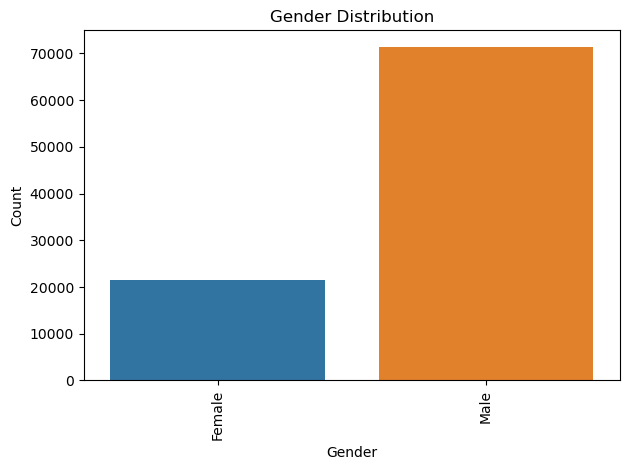

,Count,Proportion
Male,"71,370",76.8%
Female,"21,550",23.2%


In [17]:
countsplot(data,"Gender")

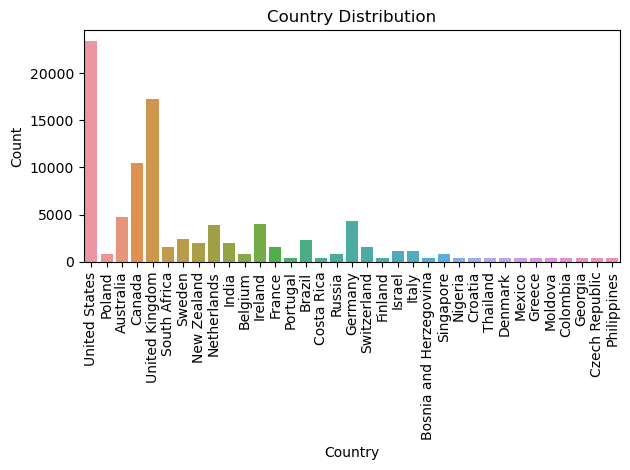

,Count,Proportion
United States,"23,358",25.1%
United Kingdom,"17,262",18.6%
Canada,"10,427",11.2%
Australia,"4,803",5.2%
Germany,"4,290",4.6%
Ireland,"3,982",4.3%
Netherlands,"3,941",4.2%
Sweden,"2,422",2.6%
Brazil,"2,340",2.5%
New Zealand,"1,991",2.1%


In [18]:
countsplot(data,'Country')

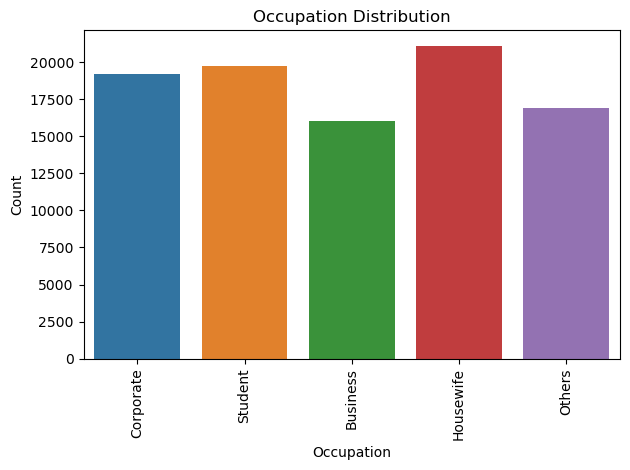

,Count,Proportion
Housewife,"21,087",22.7%
Student,"19,723",21.2%
Corporate,"19,205",20.7%
Others,"16,877",18.2%
Business,"16,028",17.2%


In [19]:
countsplot(data,'Occupation')

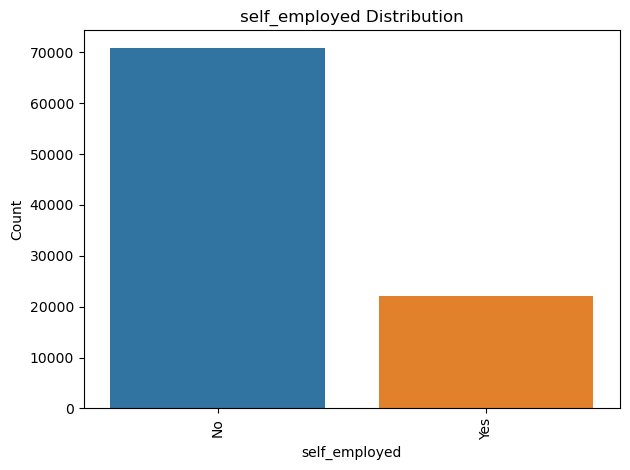

,Count,Proportion
No,"70,793",76.2%
Yes,"22,127",23.8%


In [20]:
countsplot(data,"self_employed")

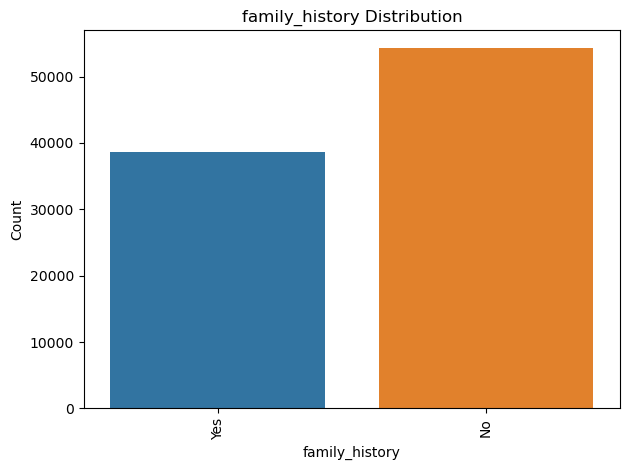

,Count,Proportion
No,"54,250",58.4%
Yes,"38,670",41.6%


In [21]:
countsplot(data,"family_history")

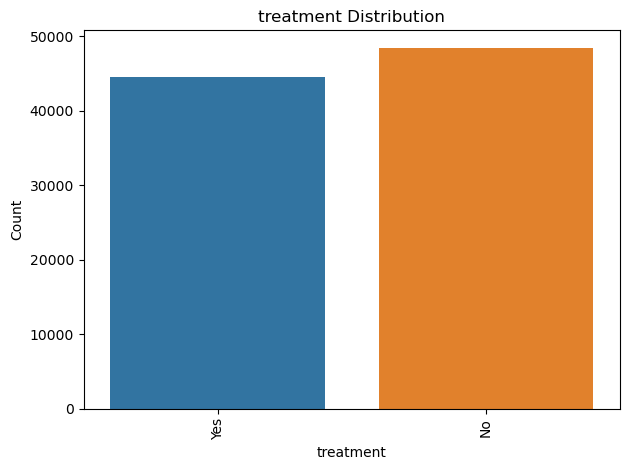

,Count,Proportion
No,"48,400",52.1%
Yes,"44,520",47.9%


In [22]:
countsplot(data,"treatment")

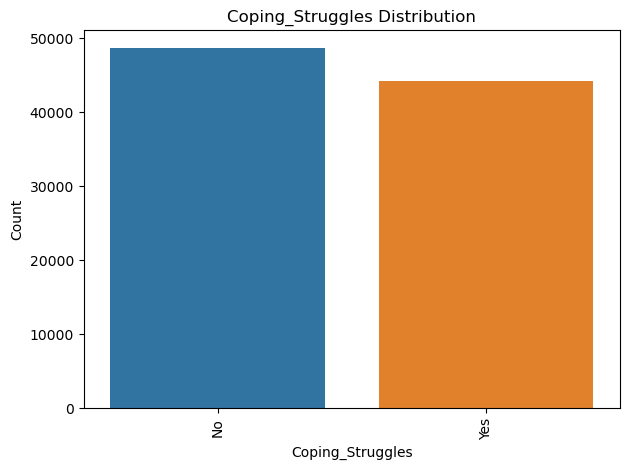

,Count,Proportion
No,"48,663",52.4%
Yes,"44,257",47.6%


In [23]:
countsplot(data,"Coping_Struggles")

In [24]:


def top_10_bar(data, category, x_rotation=45):
    """
    Plots a bar plot showing the distribution of a categorical variable for the top 10 categories.

    Args:
        data (DataFrame): The DataFrame containing the data.
        category (str): The column name for the categorical variable to plot.
        x_rotation (int, optional): The number of degrees to rotate the x-axis labels. Defaults to 45.
    """
    # Get the top 10 categories and their counts in a DataFrame
    top_10_df = data[category].value_counts().head(10).reset_index()
    top_10_df.columns = [category, 'count']  # Renaming the count column

    # Plotting
    sns.barplot(data=top_10_df, x=category, y='count')
    plt.title(f'Top 10 {category}')
    plt.xticks(rotation=x_rotation)
    plt.xlabel(category)
    plt.ylabel("Count")
    plt.show()

# Example usage:
# Assuming 'data' is your


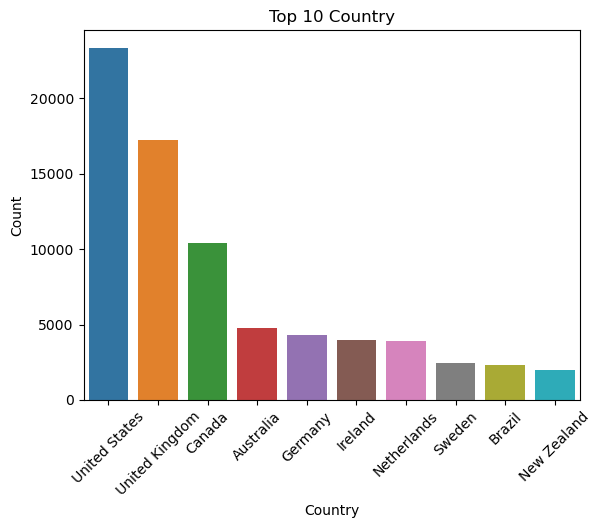

In [25]:
top_10_bar(data,"Country")


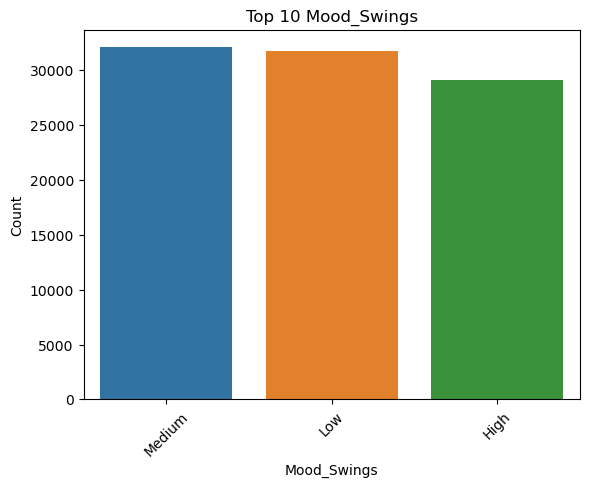

In [26]:
top_10_bar(data,"Mood_Swings")

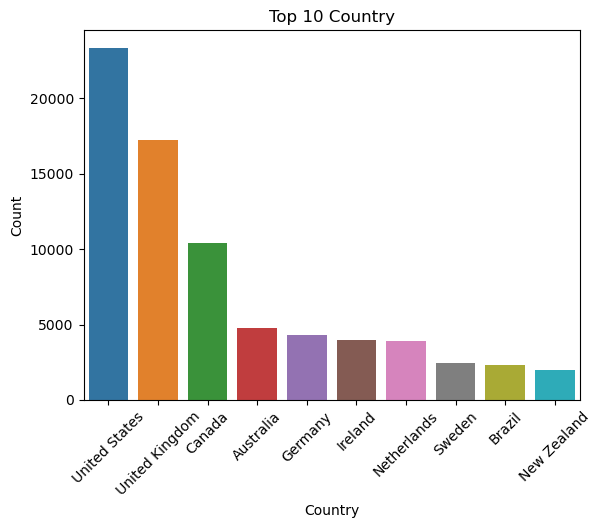

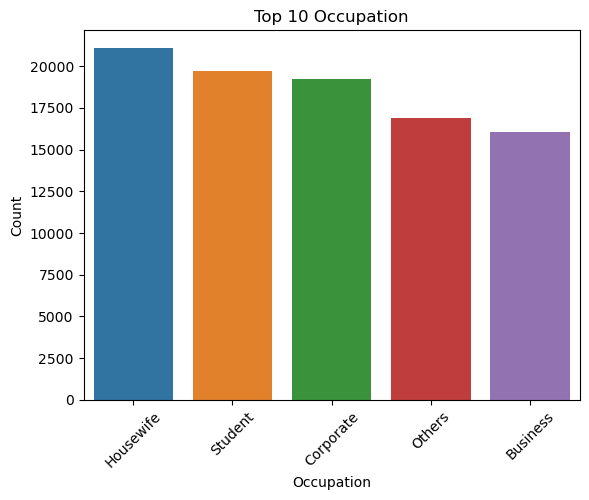

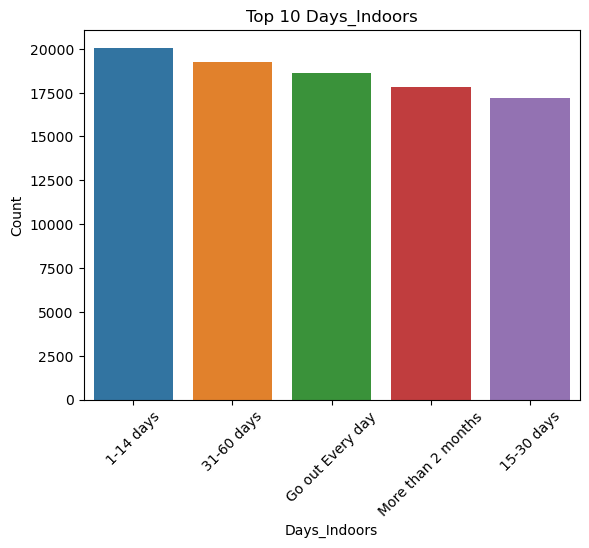

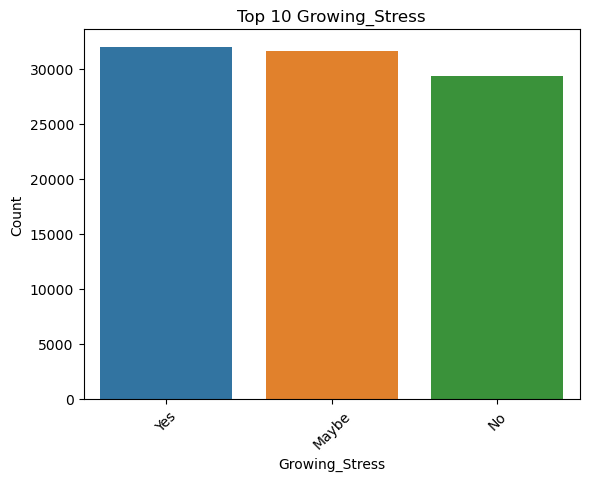

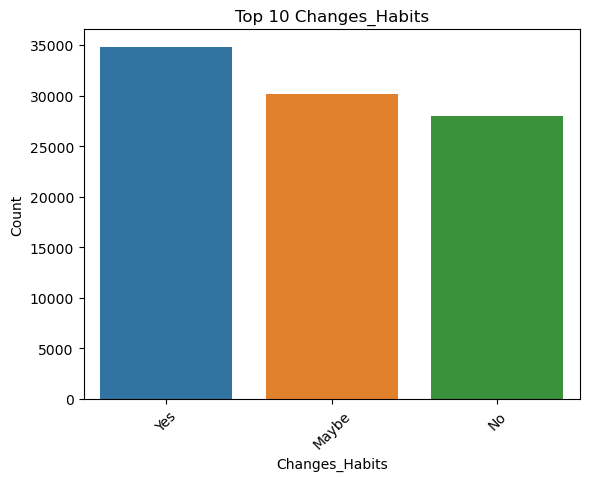

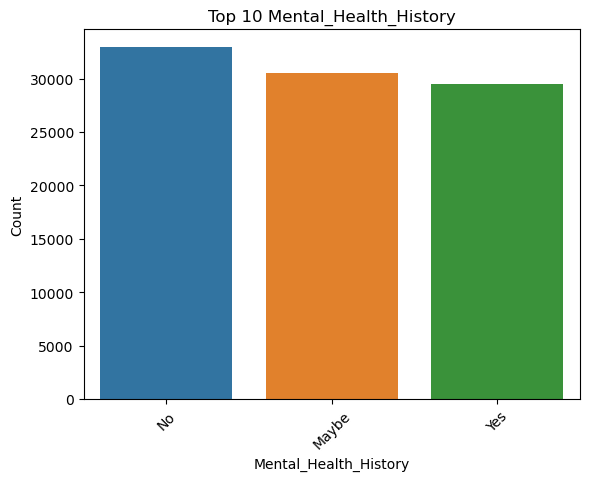

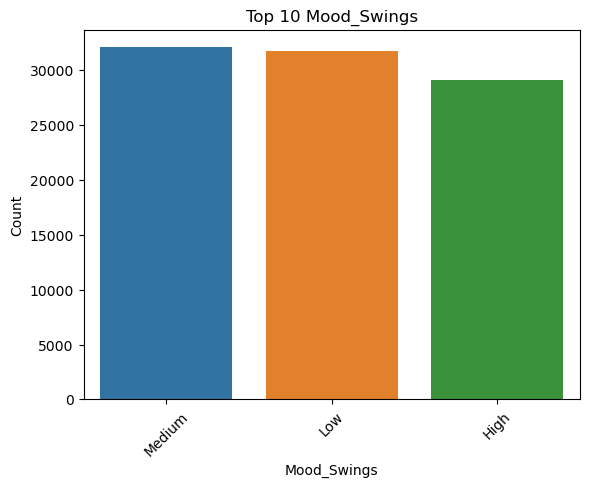

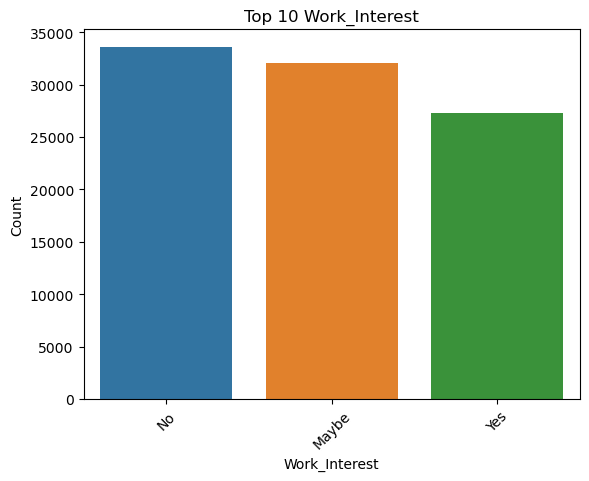

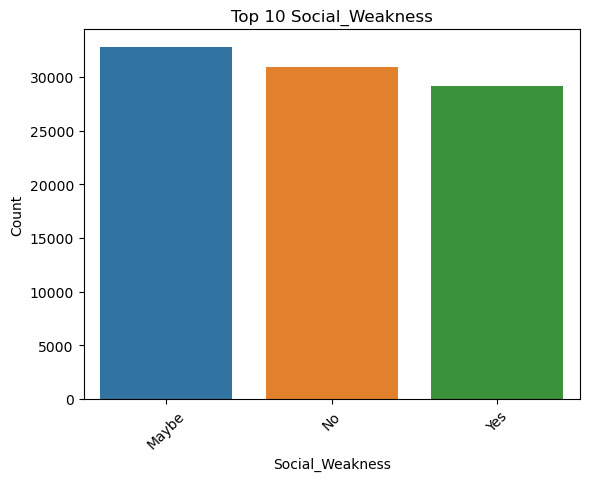

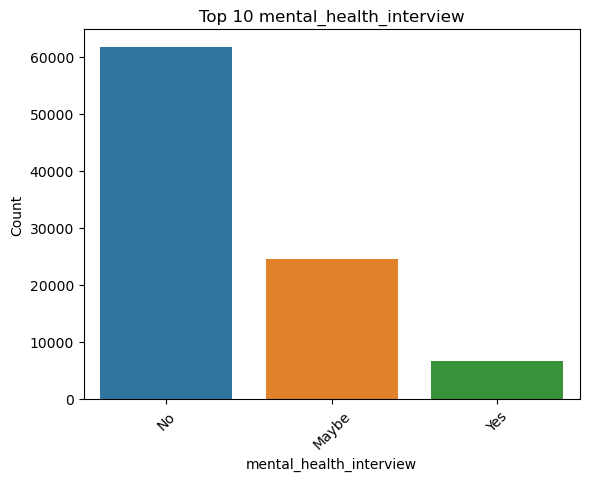

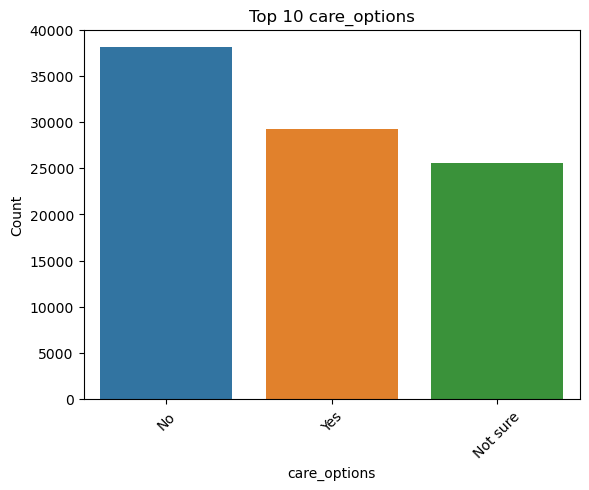

In [30]:
for column in data.columns:
    if data[column].nunique() >2:
        top_10_bar(data,column)   

# Bivariate Anlaysis

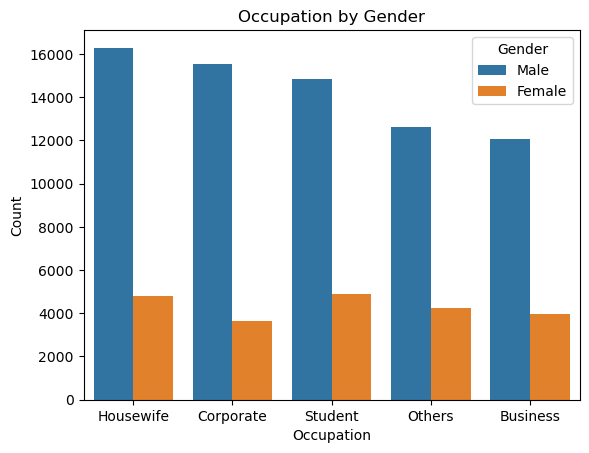

,Gender,Occupation,Count
5,Male,Housewife,16287
6,Male,Corporate,15555
7,Male,Student,14823
8,Male,Others,12627
9,Male,Business,12078
0,Female,Student,4900
1,Female,Housewife,4800
2,Female,Others,4250
3,Female,Business,3950
4,Female,Corporate,3650


In [31]:
# Group data by Gender then filter by Occupation and count occurrences
gender_data = (
    data
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Count")
    .sort_values(by = "Count", ascending = False)
)

sns.barplot(data = gender_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Occupation by Gender")
plt.show()

gender_data

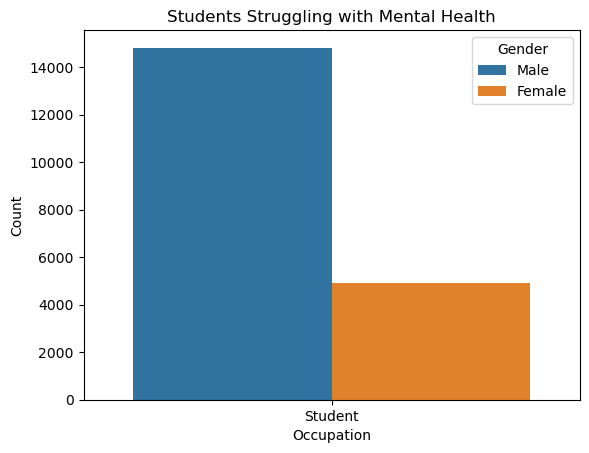

,Gender,Occupation,Count,Percentage
7,Male,Student,14823,75.2
0,Female,Student,4900,24.8


In [32]:
# Filter the gender data to include only entries where the occupation is "Student"
student_data = gender_data[gender_data["Occupation"] == "Student"]

sns.barplot(data = student_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Students Struggling with Mental Health")
plt.show()

# Get the total count
total_student_count = student_data["Count"].sum() 

# Calculate percentages based on gender counts
student_data["Percentage"] = (
    student_data["Gender"]
    .apply(
        lambda gender: round((student_data.loc[student_data["Gender"] == gender, "Count"].iloc[0] / total_student_count) * 100, 1)
    )
)

student_data


In [34]:
# Filter the DataFrame to include only United States students and count occurrences by gender
us_student_data = (
    data
    .loc[(data["Country"] == "United States") & (data["Occupation"] == "Student")]
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Count")
)

# Get the total count
total_us_student_count = us_student_data["Count"].sum() 

# Calculate percentages based on gender counts
us_student_data["Percentage"] = (
    us_student_data["Gender"]
    .apply(
        lambda gender: round((us_student_data.loc[us_student_data["Gender"] == gender, "Count"].iloc[0] / total_us_student_count) * 100, 1)
    )
)

us_student_data

,Gender,Occupation,Count,Percentage
0,Female,Student,1764,35.3
1,Male,Student,3240,64.7


# Data Preprocessing

In [41]:
# Creating a LabelEncoder object
le=LabelEncoder()
encoded_df=data.apply(le.fit_transform)
encoded_df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2
5,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1
6,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1
7,0,34,1,0,0,0,0,2,1,2,2,0,1,2,1,0


In [42]:
X=encoded_df.drop('Mood_Swings',axis=1)

y=encoded_df['Mood_Swings']
y

3         2
4         2
5         2
6         2
7         2
         ..
292342    1
292350    1
292355    1
292359    1
292360    1
Name: Mood_Swings, Length: 92920, dtype: int32

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=42)
print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)

(74336, 15) (18584, 15)
(74336,) (18584,)


# Model Building & Comparisons

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score

def pipeline_classification(pipelines, xtrain, ytrain, xtest):
    """
    Performs classification using cross-validation, evaluates different models,
    and makes predictions for each model on the test set.

    Args:
        pipelines (list): List of tuples containing model names and pipeline objects.
        X_train (array-like): Training input samples.
        y_train (array-like): Target values for training.
        X_test (array-like): Test input samples.

    Returns:
        pandas.DataFrame: A DataFrame containing model names, mean accuracy, standard deviation,
                          and a dictionary with test set predictions for each model.
    """
    # Initialize lists and dictionaries to store results
    cv_results = []
    model_names = []
    model_predictions = {}
    model_probabilities = {}

    # Perform cross-validation and store results
    for name, pipe in pipelines:
        # Fit the pipeline to the training data
        pipe.fit(xtrain, ytrain)

        kfold = KFold(n_splits=10, shuffle=True)
        cv_results.append(cross_val_score(pipe, xtrain, ytrain, cv=kfold, scoring='accuracy', n_jobs=-1))
        model_names.append(name)

        # Make predictions on the test set and store them
        model_predictions[name] = pipe.predict(xtest)

        # Calculate probabilities on the test set and store them
        model_probabilities[name] = pipe.predict_proba(xtest)

    # Plot the results
    plt.boxplot(cv_results)
    plt.xticks(range(1, len(model_names) + 1), model_names, rotation=45)
    plt.title('Algorithm Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.show()

    # Convert results to a DataFrame
    results_df = pd.DataFrame({
        'Model': model_names,
        'Mean Accuracy': [scores.mean() for scores in cv_results],
        'Standard Deviation': [scores.std() for scores in cv_results]
    })

    return results_df, model_predictions, model_probabilities


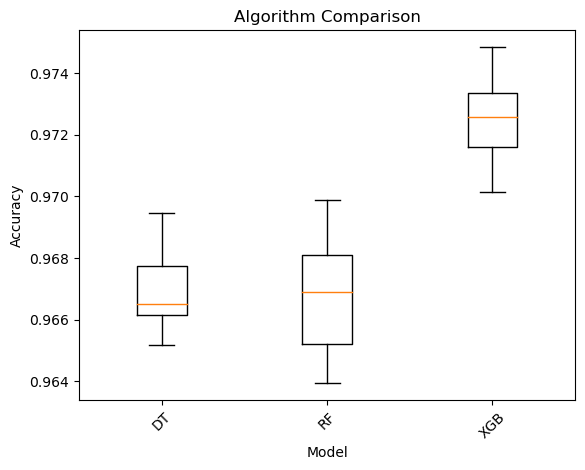

,Model,Mean Accuracy,Standard Deviation
0,DT,0.966907,0.001279
1,RF,0.966705,0.001885
2,XGB,0.972557,0.001311


In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the list of pipelines
pipelines = [
    ('DT', Pipeline([('scaler', MinMaxScaler()), ('DT', DecisionTreeClassifier())])),
    ('RF', Pipeline([('scaler', MinMaxScaler()), ('RF', RandomForestClassifier())])),
    ('XGB', Pipeline([('XGB', XGBClassifier())])),
]

results_df, model_predictions, model_probabilities = pipeline_classification(pipelines, xtrain, ytrain, xtest)
results_df


In [56]:

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name="", class_names=None, cmap="Blues", title=""):
    """
    Plots a confusion matrix for classification tasks.

    Args:
        y_true (array-like): True labels for the data.
        y_pred (array-like): Predicted labels for the data.
        model_name (str): Name of the model.
        class_names (list, optional): List of class names for the labels.
        cmap (str, optional): Colormap to use for the heatmap. Defaults to 'Blues'.
        title (str, optional): Title for the confusion matrix plot. Defaults to an empty string.

    Returns:
        None
    """

    cm = confusion_matrix(y_true, y_pred)

    if class_names is None:
        class_names = np.unique(y_true)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap=cmap,
        xticklabels=class_names,
        yticklabels=class_names
    )

    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


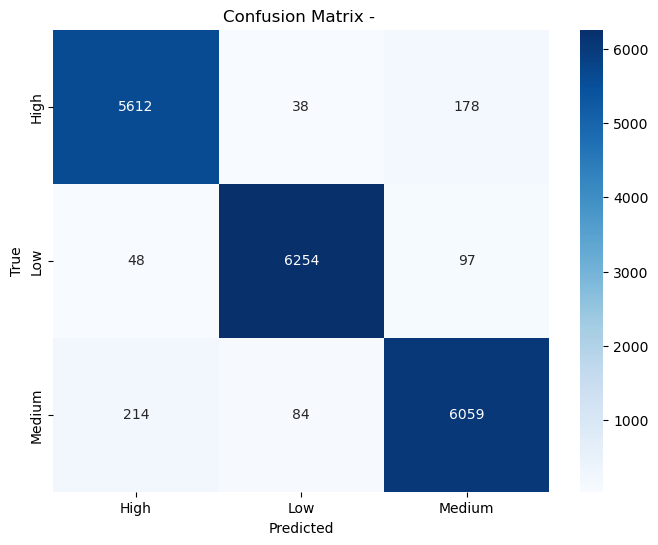

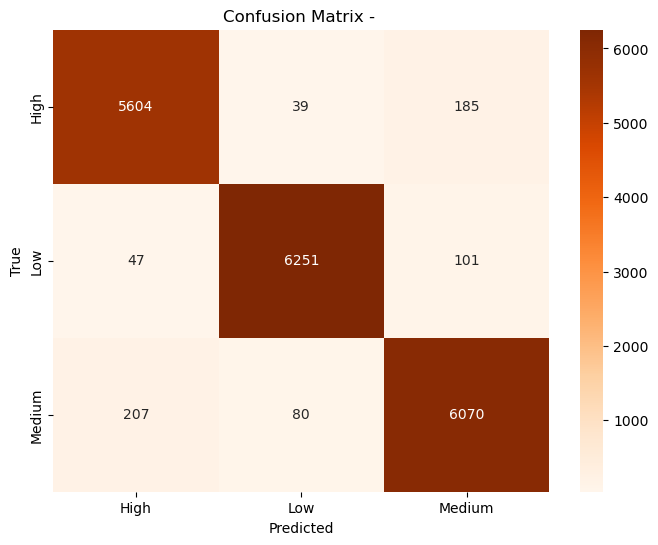

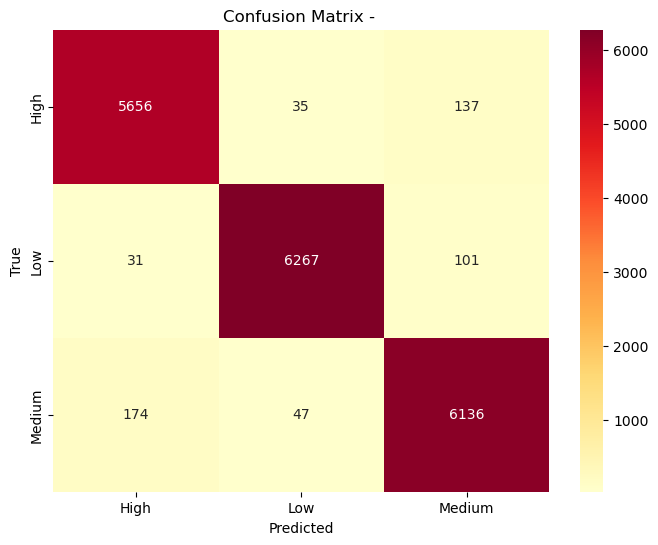

In [59]:
# Extract model names
models = results_df.loc[:, "Model"]

# Extract model predictions
predictions = list(model_predictions.values())

# Define labels for the class outputs
labels = data["Mood_Swings"].unique()[::-1]

# Define a dictionary mapping model names to colormaps
cmap_dict = {'DT': 'Blues', 'RF': 'Oranges', 'XGB': 'YlOrRd'}

for model_name, y_pred in zip(models, predictions):
    plot_confusion_matrix(
       ytest,
      y_pred,
      class_names = labels,
      cmap = cmap_dict.get(model_name),
      title = model_name
  )

In [64]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_model_scores(models, predictions, ytest, average="None"):
    """
    Calculates and returns precision, recall, and F1 scores for each model.

    Args:
        models: A list of trained machine learning models.
        predictions: A list of predictions for each model, corresponding to the models list.
        y_test: True labels for the test set.
        average (str, optional): Averaging type for metrics.

    Returns:
        A Pandas DataFrame containing the model scores.
    """

    scores = [{
        'Model': model_name,
        'Accuracy': round(accuracy_score(ytest, y_pred), 3),
        'Precision': round(precision_score(ytest, y_pred, average=average), 3),
        'Recall': round(recall_score(ytest, y_pred, average=average), 3),
        'F1 Score': round(f1_score(ytest, y_pred, average=average), 3)
    } for model_name, y_pred in zip(models, predictions)]

    scores_df = pd.DataFrame(scores)

    return scores_df


In [65]:
scores = get_model_scores(models, predictions, ytest, average = "macro")

scores

,Model,Accuracy,Precision,Recall,F1 Score
0,DT,0.965,0.964,0.964,0.964
1,RF,0.965,0.964,0.964,0.964
2,XGB,0.972,0.972,0.972,0.972
